In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import rdkit.Chem as Chem
from rdkit.Chem import Draw
from IPython.display import SVG

In [6]:
BASE = '../'

data = pd.read_csv('../data/molbank/Img2Mol/staker/staker.csv')
# data = pd.read_csv('../data/molbank/Img2Mol/JPO.csv')
pred = pd.read_csv('../output/pubchem/swin_base_200k_joint/prediction_staker.csv')

CC([C@H](N)C(N1[C@H](C(OC(C)(C)C)=O)C[C@@]2(OC(=O)N(C3C=CC=CC=3)C2)C1)=O)(C)C
1
data/molbank/Img2Mol/staker/images/1.png
gold: CC(C)(C)OC(=O)[C@H]1C[C@]2(CN(c3ccccc3)C(=O)O2)CN1C(=O)[C@H](N)C(C)(C)C
pred: CC(C)(C)OC(=O)[C@@H]1C[C@@]2(CN(c3ccccc3)C(=O)O2)CN1C(=O)[C@@H](N)C(C)(C)C
False
(256, 256, 3)


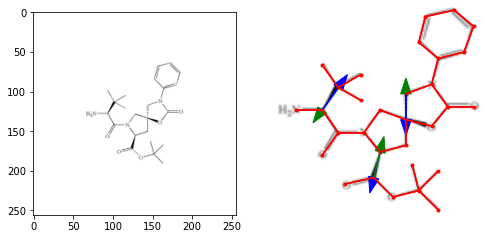

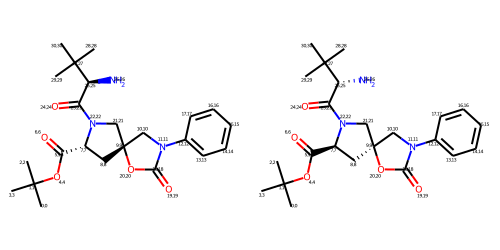

C1CCN(CC2C=NC=C(C3C(F)=C4C(C5NC6C=CN=C(C6C=COC=6)C=6N=5)=NNC4=CC=3)C=2)CC1
3
data/molbank/Img2Mol/staker/images/3.png
gold: Fc1c(-c2cncc(CN3CCCCC3)c2)ccc2[nH]nc(-c3nc4c(-c5ccoc5)nccc4[nH]3)c12
pred: Fc1c(-c2cncc(CN3CCCCC3)c2)ccc2[nH]nc(C3=NC4=COC=CC5C4=NC=CC5N3)c12
False
(256, 256, 3)


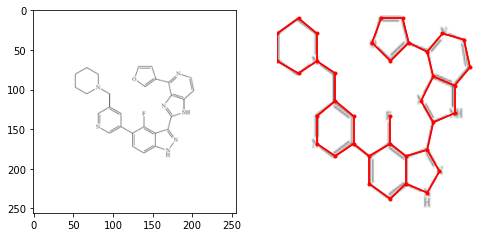

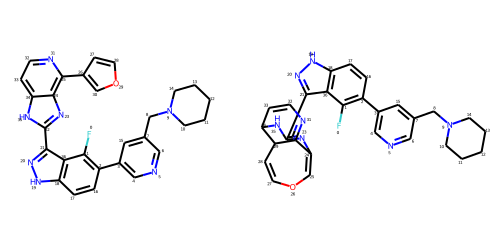

C1CN(CC2C=NC=C(C3C(F)=C4C(C5NC6C=CN=C(C6C=COC=6)C=6N=5)=NNC4=CC=3)C=2)CC1
4
data/molbank/Img2Mol/staker/images/4.png
gold: Fc1c(-c2cncc(CN3CCCC3)c2)ccc2[nH]nc(-c3nc4c(-c5ccoc5)nccc4[nH]3)c12
pred: Fc1c(-c2cncc(CN3CCCC3)c2)ccc2[nH]nc(C3=NC4=COC=CC5C4=NC=CC5N3)c12
False
(256, 256, 3)


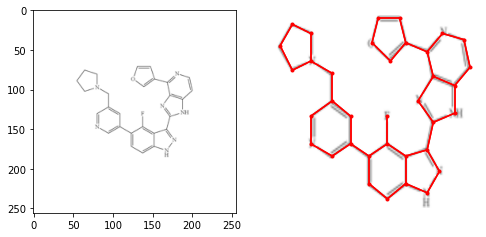

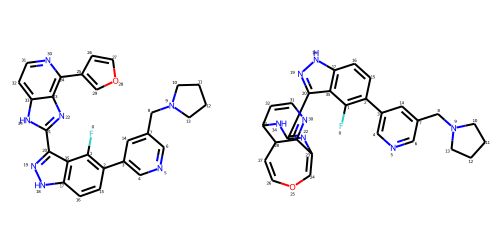

C1C(Cl)=CC=C2NC=C([SH2][R12])C=12
14
data/molbank/Img2Mol/staker/images/14.png
gold: CC(C)c1c[nH]c2ccc(Cl)cc12
pred: [12*][SH2]c1c[nH]c2ccc(Cl)cc12
False
(256, 256, 3)


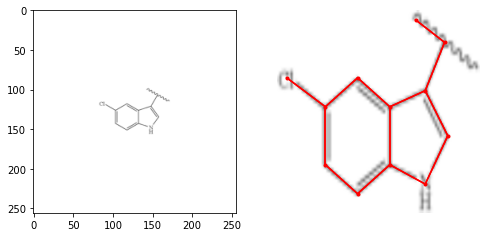

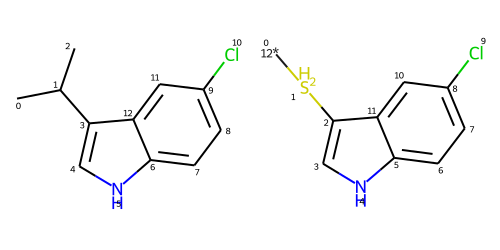

C1C([CCl3])=CC=C2NC=C([18F])C=12
15
data/molbank/Img2Mol/staker/images/15.png
gold: CC(C)c1c[nH]c2ccc(CO)cc12
pred: [18F]c1c[nH]c2ccc(C(Cl)(Cl)Cl)cc12
False
(256, 256, 3)


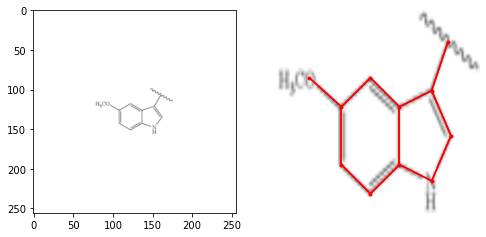

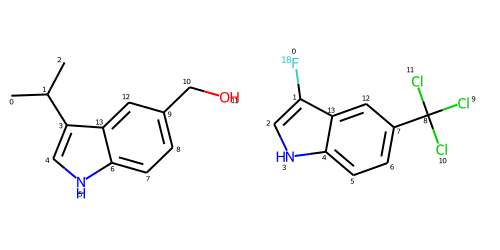

CC(C1C=CC([NO2])=C([N+](=O)=O)C=1)(C)C
19
data/molbank/Img2Mol/staker/images/19.png
gold: CC(C)(C)c1ccc(N)c([N+](=O)[O-])c1
pred: CC(C1C=CC([NO2])=C([N+](=O)=O)C=1)(C)C
False
(256, 256, 3)


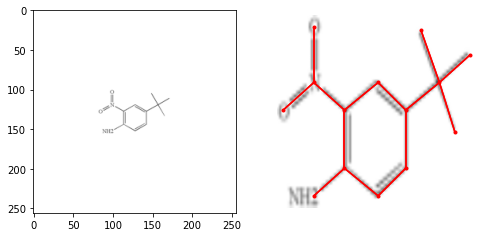

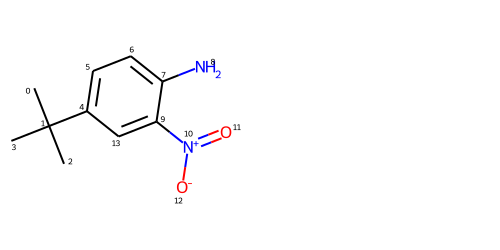

C[Si](/C=C/C1C=CC=C(N2N=CC3C(NCC(O)=O)=NC=NC2=3)C=1)(C)C
20
data/molbank/Img2Mol/staker/images/20.png
gold: C[Si](C)(C)C#Cc1cccc(-n2ncc3c(NCC(=O)O)ncnc32)c1
pred: C[Si](C)(C)C=Cc1cccc(-n2ncc3c(NCC(=O)O)ncnc32)c1
False
(256, 256, 3)


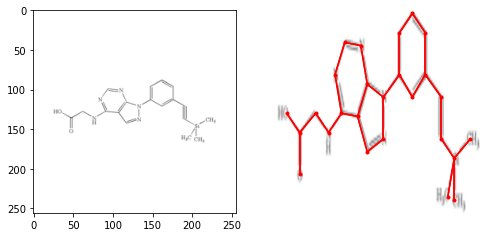

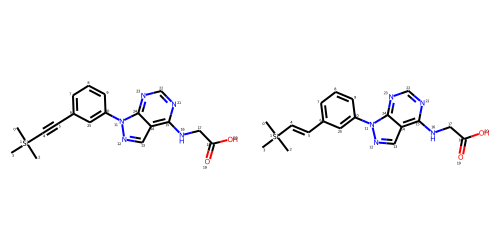

C[Si](/C=C/C1C=CC=C(N2N=CC3C(NCC4C=C(OC)C(OC)=C(OC)C=4)=NC=NC2=3)C=1)(C)C
21
data/molbank/Img2Mol/staker/images/21.png
gold: COc1cc(CNc2ncnc3c2cnn3-c2cccc(C#C[Si](C)(C)C)c2)cc(OC)c1OC
pred: COc1cc(CNc2ncnc3c2cnn3-c2cccc(C=C[Si](C)(C)C)c2)cc(OC)c1OC
False
(256, 256, 3)


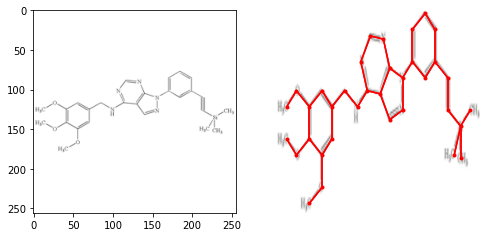

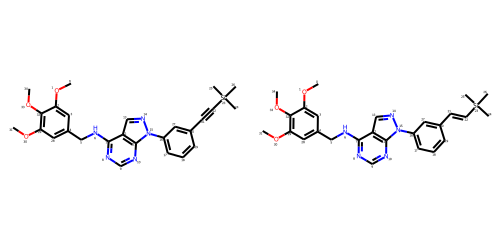

C([C@H](NC(C1C(Cl)=CC2CN(C(/C=C/C3C=CC=CC=3F)=O)CCC=2C=1Cl)=O)C(O)=O)C1C=CC=C(S(C)(=O)=O)C=1
23
data/molbank/Img2Mol/staker/images/23.png
gold: CS(=O)(=O)c1cccc(C[C@@H](NC(=O)c2c(Cl)cc3c(c2Cl)CCN(C(=O)C=Cc2ccccc2F)C3)C(=O)O)c1
pred: CS(=O)(=O)c1cccc(C[C@H](NC(=O)c2c(Cl)cc3c(c2Cl)CCN(C(=O)C=Cc2ccccc2F)C3)C(=O)O)c1
False
(256, 256, 3)


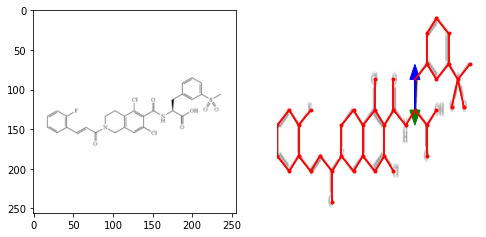

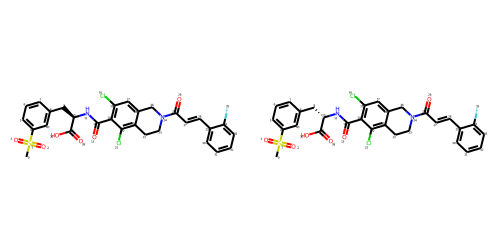

C([As]C(N(C1C=CC=CC=1)C)=O)(N(C1C=CC=CC=1)C)=O
30
data/molbank/Img2Mol/staker/images/30.png
gold: CN(C(=O)[Te]C(=O)N(C)c1ccccc1)c1ccccc1
pred: CN(C(=O)[As]C(=O)N(C)c1ccccc1)c1ccccc1
False
(256, 256, 3)


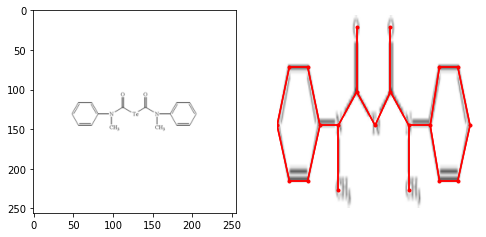

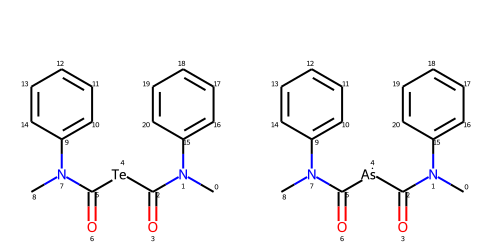

C[C@@](OC1C=CC2C(I)=CC(OC=2C=1)=O)(C)C
32
data/molbank/Img2Mol/staker/images/32.png
gold: Cc1cc(=O)oc2cc(OC(C)(C)C)ccc12
pred: CC(C)(C)Oc1ccc2c(I)cc(=O)oc2c1
False
(256, 256, 3)


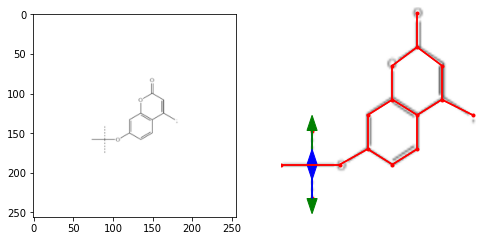

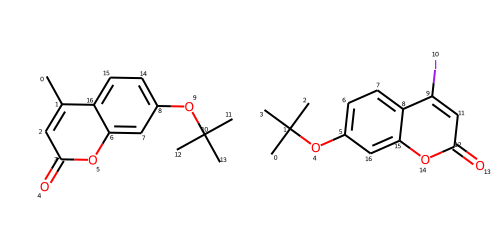

C/C=[C@]1(O)[C@@H](CC)N(C2C=C(Cl)C([O2N])=CC=2)CC1
33
data/molbank/Img2Mol/staker/images/33.png
gold: CC[C@H]1N(c2ccc(C#N)c(Cl)c2)CC[C@]1(O)CC
pred: C/C=[C@]1(O)[C@@H](CC)N(C2C=C(Cl)C([O2N])=CC=2)CC1
False
(256, 256, 3)


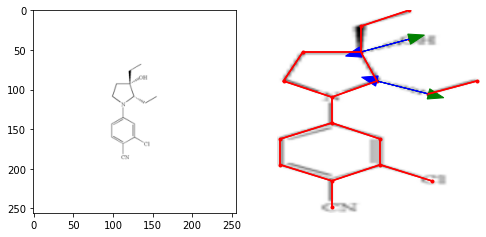

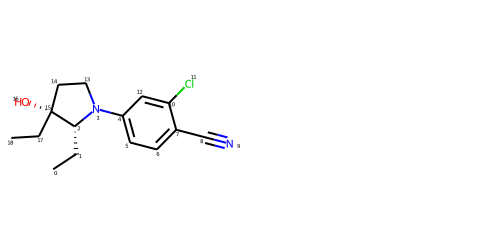

CC[C@]1(O)[C@@H](CC)N(C2C=C(F)C([CN])=C(F)C=2)CC1
34
data/molbank/Img2Mol/staker/images/34.png
gold: CC[C@H]1N(c2cc(F)c(C#N)c(F)c2)CC[C@]1(O)CC
pred: CC[C@@H]1N(c2cc(F)c(C#N)c(F)c2)CC[C@@]1(O)CC
False
(256, 256, 3)


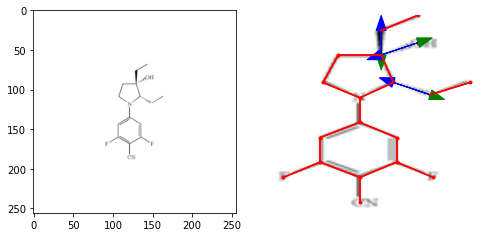

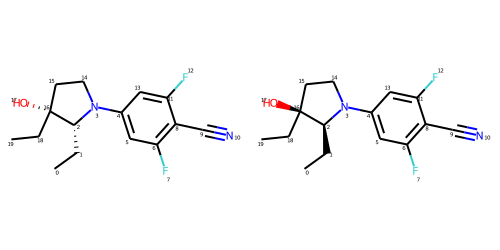

C/C=[C@]1(O)[C@@H](CC)N(C2C=C(F)C([O2N])=CC=2)CC1
35
data/molbank/Img2Mol/staker/images/35.png
gold: CC[C@H]1N(c2ccc(C#N)c(F)c2)CC[C@]1(O)CC
pred: C/C=[C@]1(O)[C@@H](CC)N(C2C=C(F)C([O2N])=CC=2)CC1
False
(256, 256, 3)


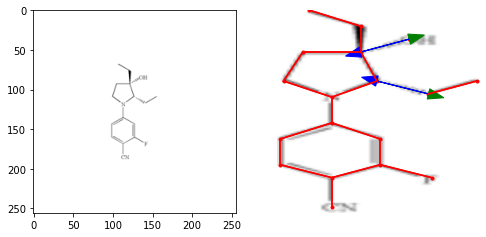

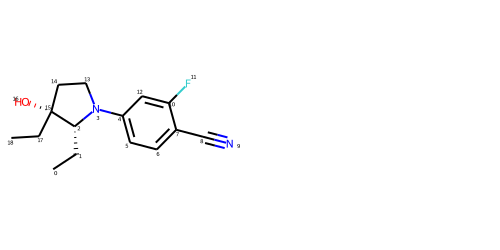

CCCCCCCCCCCCCCC[C@H]1OC(=O)N[C@H]1C
36
data/molbank/Img2Mol/staker/images/36.png
gold: CCCCCCCCCCCCCCC[C@H]1OC(=O)N[C@H]1C
pred: CCCCCCCCCCCCCCCC1OC(=O)N[C@H]1C
False
(256, 256, 3)


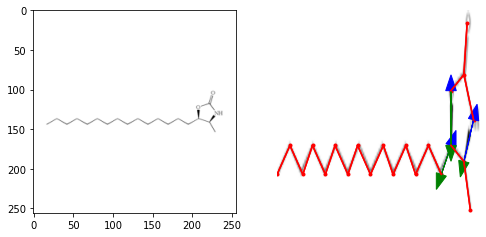

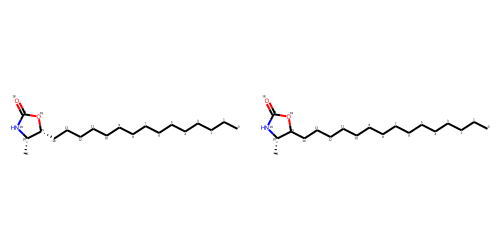

C1C([F3C])=CC=C2SC3C(CS)=CSC=3N=1
42
data/molbank/Img2Mol/staker/images/42.png
gold: FC(F)(F)c1ccc(Sc2cscc2CS)nc1
pred: C1C([F3C])=CC=C2SC3C(CS)=CSC=3N=1
False
(256, 256, 3)


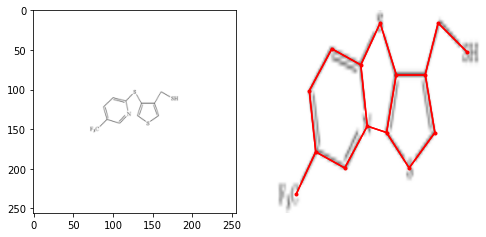

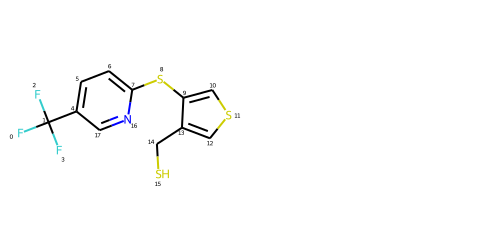

COC[C@H]1N(C2C=NC=C([Rc])C=2)CCC1
46
data/molbank/Img2Mol/staker/images/46.png
gold: COC[C@@H]1CCCN1c1cncc(Br)c1
pred: [15*]c1cncc(N2CCC[C@H]2COC)c1
False
(256, 256, 3)


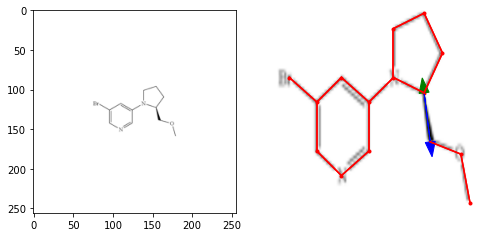

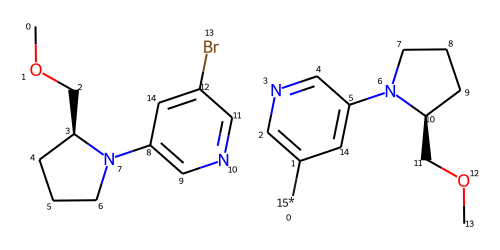

C1CC2C([Bn])=CN=CC=2C(O)C1
47
data/molbank/Img2Mol/staker/images/47.png
gold: OC1CCCc2c(Br)cncc21
pred: OC1CCCc2c(Cc3ccccc3)cncc21
False
(256, 256, 3)


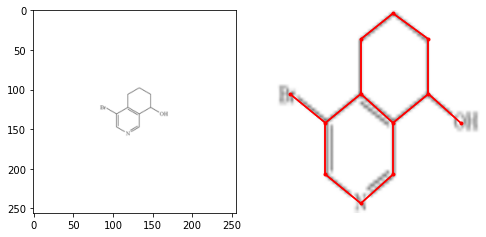

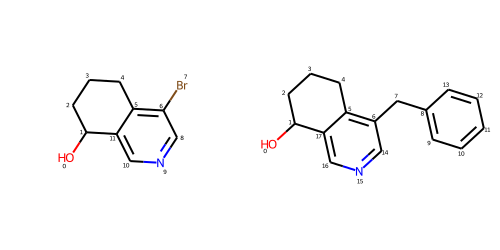

C1CN(CC2C=NC=C([Bn])C=2)C(=O)CC1
49
data/molbank/Img2Mol/staker/images/49.png
gold: O=C1CCCCN1Cc1cncc(Br)c1
pred: O=C1CCCCN1Cc1cncc(Cc2ccccc2)c1
False
(256, 256, 3)


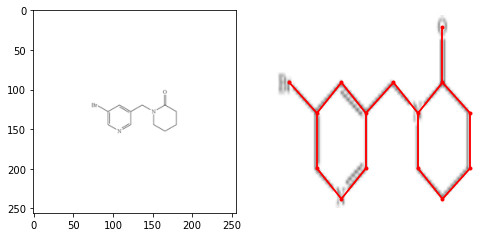

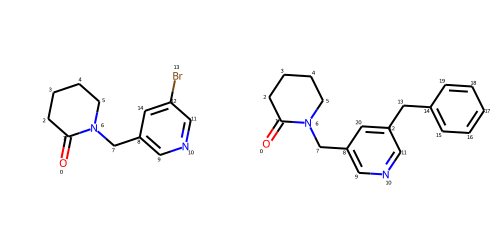

CN(CC#CC1C=CC(O)=C2C=1C[C@]1([H])C(=C(O)[C@]3(O)C(=O)C(C(N)=O)=C(O)C[C@]3([H])C1)C2=O)C
65
data/molbank/Img2Mol/staker/images/65.png
gold: CN(C)CC#Cc1ccc(O)c2c1C[C@@H]1C[C@@H]3CC(O)=C(C(N)=O)C(=O)[C@]3(O)C(O)=C1C2=O
pred: CN(C)CC#Cc1ccc(O)c2c1CC1CC3CC(O)=C(C(N)=O)C(=O)C3(O)C(O)=C1C2=O
False
(256, 256, 3)


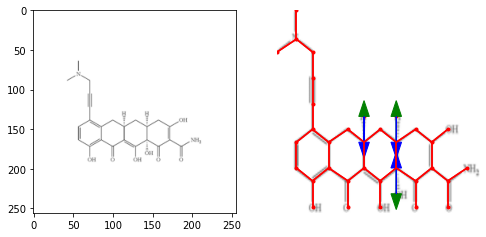

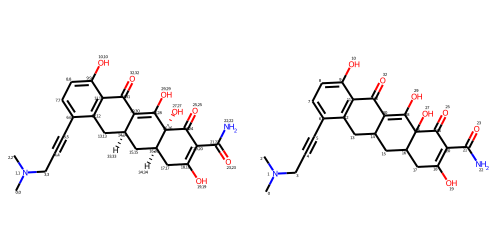

In [12]:
from bms.chemistry import canonicalize_smiles, _expand_functional_group, _postprocess_smiles
from bms.augment import CropWhite
import albumentations as A
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 600,600

transform = A.Compose([CropWhite(pad=0), A.Resize(384,384)])

cnt = 0 
for i, row in data.iterrows():
    gold_smiles,_ = canonicalize_smiles(row['SMILES'], ignore_cistrans=True)
    pred_smiles,_ = canonicalize_smiles(pred.loc[i,'post_SMILES'], ignore_cistrans=True)
    if gold_smiles == pred_smiles:
        continue
    pred_smiles = pred.loc[i,'SMILES']
    coords = np.array(eval(pred.loc[i, 'node_coords']))
    symbols = eval(pred.loc[i, 'node_symbols'])
    edges = eval(pred.loc[i, 'edges'])
    print(pred.loc[i,'SMILES'])
    pred_smiles = _postprocess_smiles(pred_smiles, coords, symbols, edges, debug=False)

    cnt += 1
    print(i)
    print(row['file_path'])
    print('gold:', gold_smiles)
    print('pred:', pred_smiles)
    print(gold_smiles == pred_smiles)
    image = cv2.imread(BASE + row['file_path'])
    print(image.shape)
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
#     plt.axis('off')
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.axis('off')
    img = transform(image=image)['image']
    plt.imshow(img)
    h, w, _ = img.shape
    x, y = coords[:,1]*w, coords[:,0]*h
    plt.scatter(x, y, color='r', marker='.')
    for i in range(len(x)):
        for j in range(len(x)):
            if edges[i][j] != 0:
                if edges[i][j] in [5, 6]:
                    color = 'blue' if edges[i][j] == 5 else 'green'
                    plt.arrow(x[i], y[i], x[j]-x[i], y[j]-y[i], color=color, head_width=20)
                else:
                    color = 'red'
                    plt.plot([x[i], x[j]], [y[i], y[j]], color)
    plt.show()
    mol = Chem.MolFromSmiles(pred_smiles)
    mol1 = Chem.MolFromSmiles(gold_smiles)
    svg = Draw.MolsToGridImage([mol1,mol], subImgSize=(250,250), molsPerRow=2, useSVG=True)
    display(svg)
    if cnt == 20:
        break

Gold: CS(=O)(=O)c1cccc(C[C@@H](NC(=O)c2c(Cl)cc3c(c2Cl)CCN(C(=O)/C=C/c2ccccc2F)C3)C(=O)O)c1
Pred: C([C@H](NC(C1C(Cl)=CC2CN(C(/C=C/C3C=CC=CC=3F)=O)CCC=2C=1Cl)=O)C(O)=O)C1C=CC=C(S(C)(=O)=O)C=1
Post: CS(=O)(=O)c1cccc(C[C@H](NC(=O)c2c(Cl)cc3c(c2Cl)CCN(C(=O)C=Cc2ccccc2F)C3)C(=O)O)c1


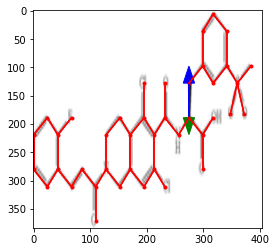

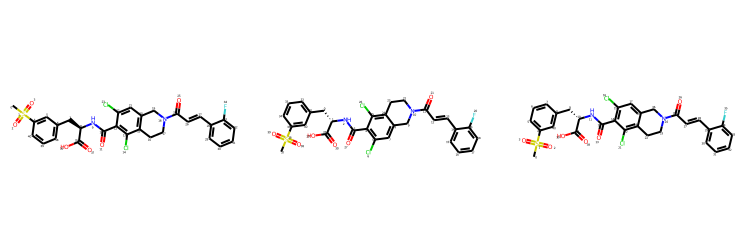

[(1, 'Tet_CCW')]
CS(=O)(=O)c1cccc(C[C@H](NC(=O)c2c(Cl)cc3c(c2Cl)CCN(C(=O)C=Cc2ccccc2F)C3)C(=O)O)c1
[[0.3333333333333333, 0.7142857142857143], [0.49206349206349204, 0.7142857142857143], [0.5714285714285714, 0.6666666666666666], [0.49206349206349204, 0.6031746031746031], [0.5714285714285714, 0.5555555555555556], [0.7301587301587301, 0.5555555555555556], [0.8095238095238095, 0.6031746031746031], [0.8095238095238095, 0.5079365079365079], [0.7301587301587301, 0.4444444444444444], [0.8095238095238095, 0.3968253968253968], [0.7301587301587301, 0.3333333333333333], [0.8095238095238095, 0.2857142857142857], [0.7301587301587301, 0.2222222222222222], [0.8095238095238095, 0.1746031746031746], [0.7301587301587301, 0.1111111111111111], [0.8095238095238095, 0.06349206349206349], [0.7301587301587301, 0.0], [0.5714285714285714, 0.0], [0.49206349206349204, 0.06349206349206349], [0.5714285714285714, 0.1111111111111111], [0.49206349206349204, 0.1746031746031746], [0.9682539682539683, 0.2857142857142857], 

In [21]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300,300
from bms.chemistry import _verify_chirality, _postprocess_smiles, _replace_functional_group
from bms.augment import CropWhite
import albumentations as A

i = 23
gold_smiles = data.loc[i, 'SMILES']
path = '../' + data.loc[i, 'file_path']
img = cv2.imread(path)
transform = A.Compose([CropWhite(pad=0), A.Resize(384,384)])
img = transform(image=img)['image']

pred_row = pred.loc[i]
pred_smiles = pred_row['SMILES']
post_smiles = pred_row['post_SMILES']

print('Gold:', canonicalize_smiles(gold_smiles)[0])
print('Pred:', pred_smiles)
print('Post:', post_smiles)

coords = eval(pred_row['node_coords'])
symbols = eval(pred_row['node_symbols'])
edges = eval(pred_row['edges'])

plt.imshow(img)
h,w,_ = img.shape
x, y = np.array(coords)[:,1]*w, np.array(coords)[:,0]*h
plt.scatter(x, y, color='r', marker='.')
for i in range(len(x)):
    for j in range(len(x)):
        if edges[i][j] != 0:
            if edges[i][j] in [5, 6]:
                color = 'blue' if edges[i][j] == 5 else 'green'
                plt.arrow(x[i], y[i], x[j]-x[i], y[j]-y[i], color=color, head_width=20)
            else:
                color = 'red'
                plt.plot([x[i], x[j]], [y[i], y[j]], color)
plt.show()

mol_gold = Chem.MolFromSmiles(gold_smiles)
pred_smiles, mappings = _replace_functional_group(pred_smiles)
mol_pred = Chem.MolFromSmiles(pred_smiles)
mol_post = Chem.MolFromSmiles(post_smiles)
img = Chem.Draw.MolsToGridImage([mol_gold,mol_pred,mol_post], subImgSize=(250,250), molsPerRow=3, useSVG=True)
display(img)
chiral_centers = Chem.FindMolChiralCenters(mol_pred, includeUnassigned=True, includeCIP=False, useLegacyImplementation=False)
print(chiral_centers)
# mol = Chem.RWMol(Chem.MolFromSmiles(pred_smiles))
# print(Chem.MolToSmiles(mol))
smiles, mol = _postprocess_smiles(pred_smiles, coords, symbols, edges, debug=True)
# smiles = Chem.MolToSmiles(mol, isomericSmiles=True, canonical=True)
print(smiles)

print(coords)
print(symbols)
print(edges)

# for atom in mol.GetAtoms():
#     print(atom.GetChiralTag())
# for bond in mol.GetBonds():
#     print(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), bond.GetBondDir())